In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Define LeNet architecture
def build_lenet(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Build and compile the LeNet model
lenet_model = build_lenet()
lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
lHistory = lenet_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
ltest_loss, ltest_acc = lenet_model.evaluate(x_test, y_test)
print(f'Test accuracy: {ltest_acc*100:.2f}%')

Epoch 1/10
469/469 [==============================] - 13s 6ms/step - loss: 0.3153 - accuracy: 0.9087 - val_loss: 0.0869 - val_accuracy: 0.9735
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0859 - accuracy: 0.9738 - val_loss: 0.0604 - val_accuracy: 0.9802
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0643 - accuracy: 0.9804 - val_loss: 0.0544 - val_accuracy: 0.9820
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0497 - accuracy: 0.9844 - val_loss: 0.0450 - val_accuracy: 0.9856
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0413 - accuracy: 0.9869 - val_loss: 0.0383 - val_accuracy: 0.9876
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0375 - val_accuracy: 0.9882
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0326 - val_accuracy: 0.9902
Epoch

In [4]:
# Define the residual block
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x

    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)

    return x

# Define ResNet architecture
def build_resnet(input_shape=(28, 28, 1), num_classes=10):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    # Add residual blocks
    for _ in range(3):
        x = residual_block(x, 64)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs, x)

# Build and compile the ResNet model
resnet_model = build_resnet()
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rHistory = resnet_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
rtest_loss, rtest_acc = resnet_model.evaluate(x_test, y_test)
print(f'Test accuracy: {rtest_acc*100:.2f}%')

Epoch 1/10
469/469 [==============================] - 9s 10ms/step - loss: 0.1398 - accuracy: 0.9603 - val_loss: 0.2243 - val_accuracy: 0.9264
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0455 - accuracy: 0.9864 - val_loss: 0.2075 - val_accuracy: 0.9293
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0530 - val_accuracy: 0.9848
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.1559 - val_accuracy: 0.9540
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0237 - accuracy: 0.9929 - val_loss: 0.1620 - val_accuracy: 0.9490
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.4359 - val_accuracy: 0.8679
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.0550 - val_accuracy: 0.9823
Epo

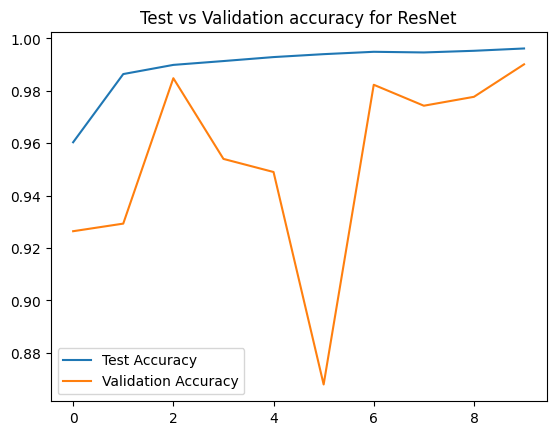

In [7]:
plt.plot(rHistory.history['accuracy'], label='Test Accuracy')
plt.plot(rHistory.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Test vs Validation accuracy for ResNet')
plt.show()

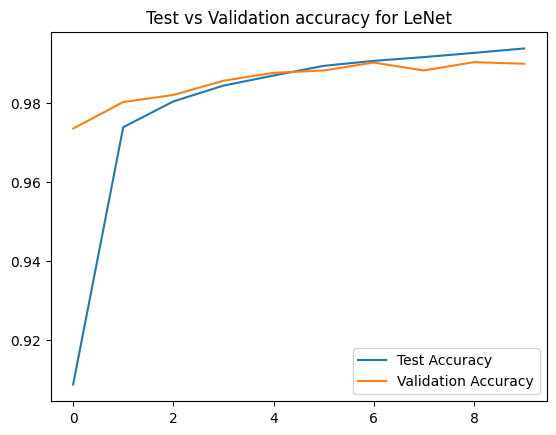

In [8]:
plt.plot(lHistory.history['accuracy'], label='Test Accuracy')
plt.plot(lHistory.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Test vs Validation accuracy for LeNet')
plt.show()